In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read saved dataframe
df = pd.read_excel('Lu_lemmatized.xls', index_col = 'WOS_ID')
corpus = pd.read_excel('corpus.xls')
corpus.columns = ['tag', 'count']

#### Replace counts with frequencies. Number of spaces  = number of words

In [4]:
df_frq = df.groupby('Publication_Year').sum()
df_frq = df_frq[df_frq.index>2005]
for word in corpus.tag:
    if type(word) == str:
        df_frq[word] = df_frq['Text'].str.count(word)/df_frq['Text'].str.count(' ')

/tmp/ipykernel_12880/3246133094.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_frq[word] = df_frq['Text'].str.count(word)/df_frq['Text'].str.count(' ')


#### Calculate row-wise median and standard deviation. We assume gaussian

In [21]:
df_frq.drop('Text', axis = 1, inplace = True)
df_frq['median'] = df_frq.median(axis = 1)
df_frq['std'] = df_frq.std(axis = 1)

#### Calculate Z-Score for each cell

In [ ]:
df_score = pd.DataFrame(df_frq)
df_score.drop('std', axis = 1, inplace = True)
df_score.drop('median', axis = 1, inplace = True)

for idx in df_score.index:
    for column in df_score:
        df_score.loc[idx,column] = (df_frq.loc[idx, column]- df_frq.loc[idx, 'median'])/df_frq.loc[idx, 'std']

<AxesSubplot:>

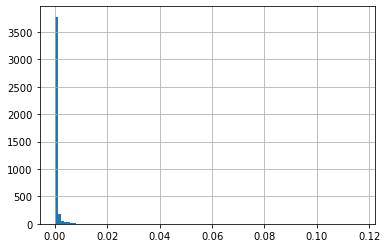

In [22]:
df_frq.iloc[15].hist(bins=100)

In [7]:
df_frq['Year'] = df_frq.index

/tmp/ipykernel_12880/1959506041.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_frq['Year'] = df_frq.index


In [8]:
corr_df = pd.DataFrame(df_frq[df_frq.Year > 2005].corr(method = 'spearman')['Year'])

In [11]:
corr_df = corr_df[(corr_df.Year > 0.7)]

In [15]:
export = df_frq[df_frq.columns.intersection(corr_df.index)]

In [16]:
export.to_excel('High correlation.xls')

/tmp/ipykernel_12880/3202738133.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  export.to_excel('High corelation.xls')


/home/artem/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


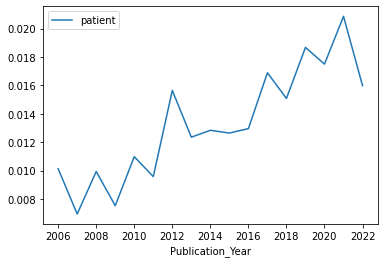

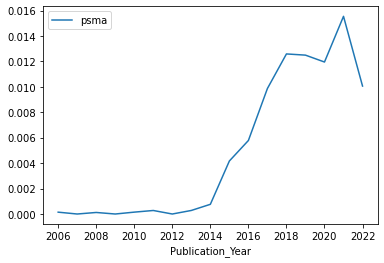

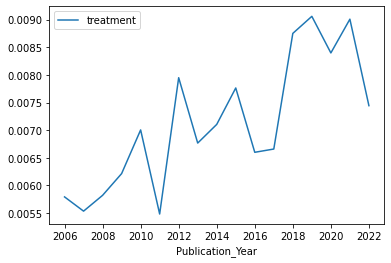

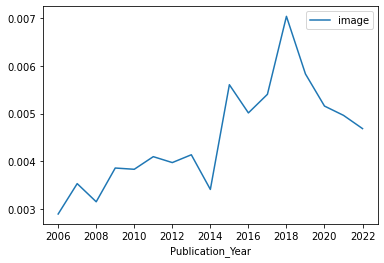

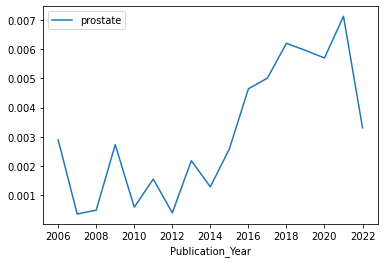

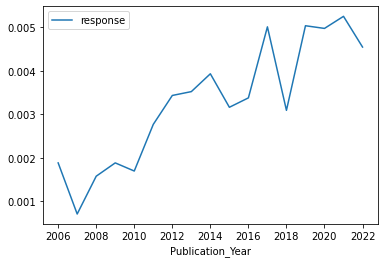

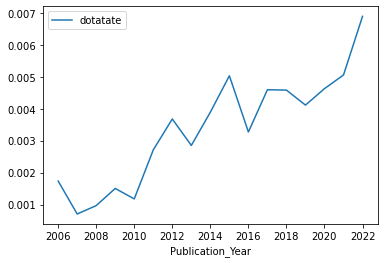

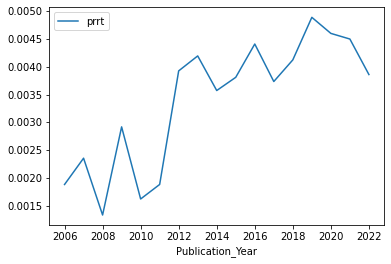

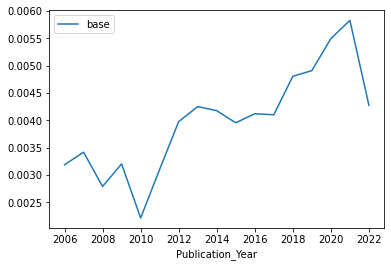

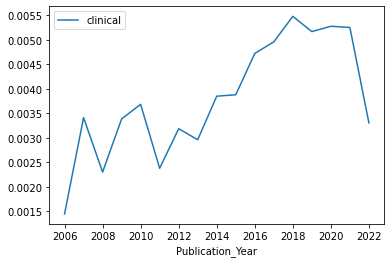

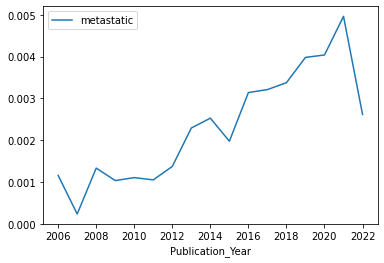

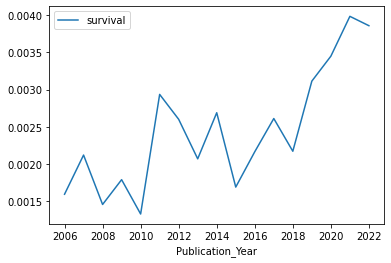

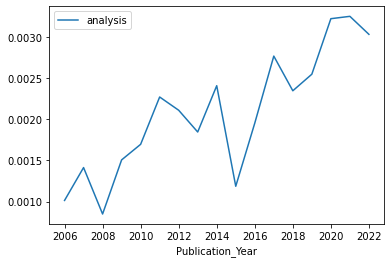

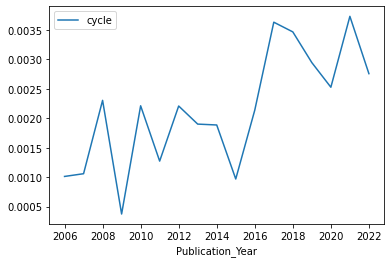

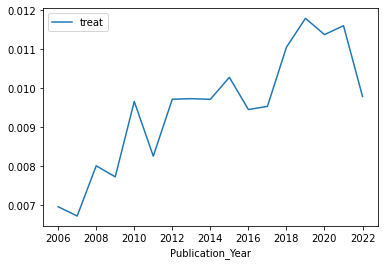

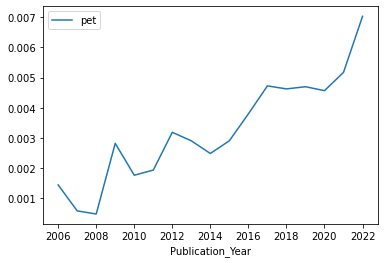

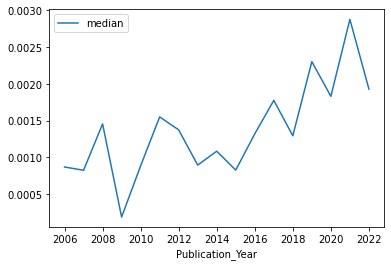

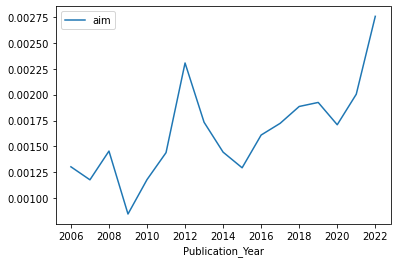

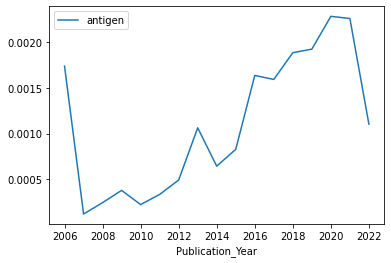

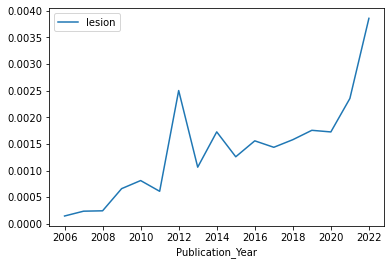

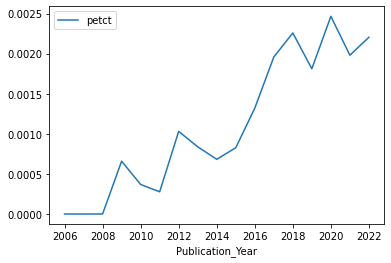

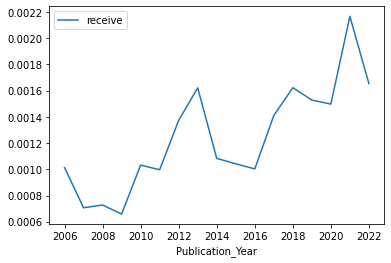

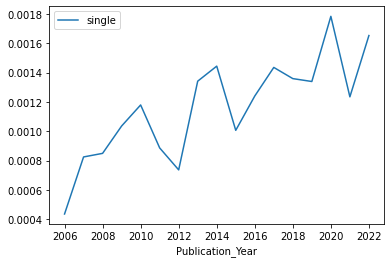

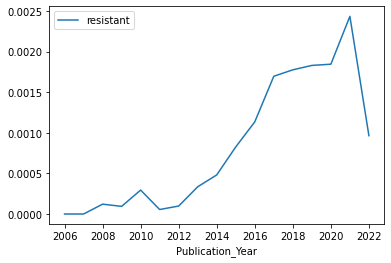

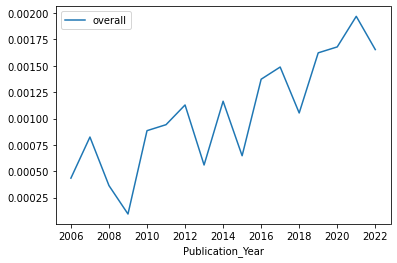

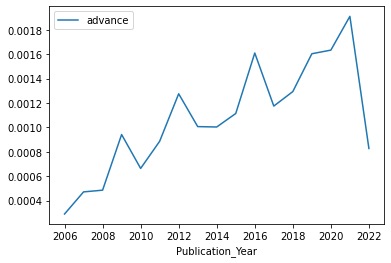

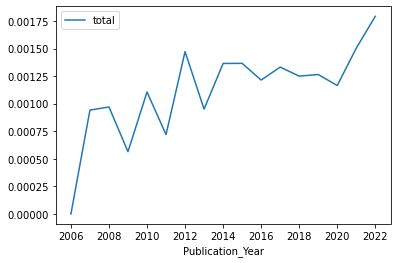

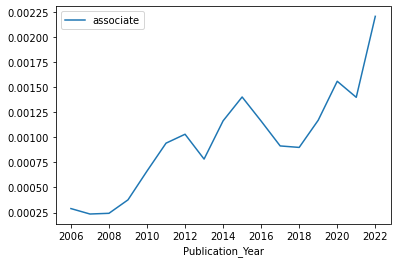

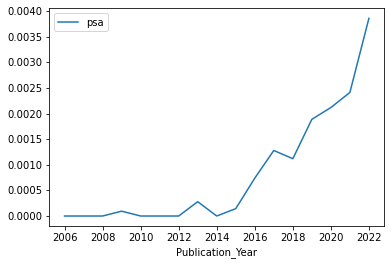

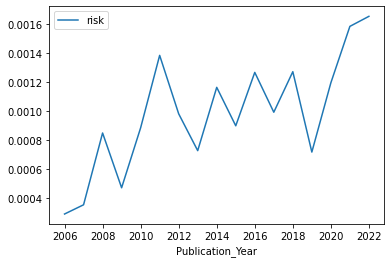

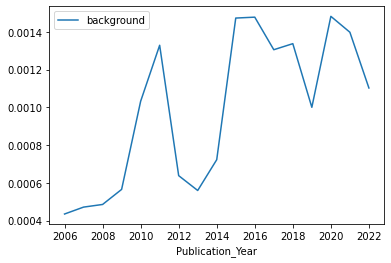

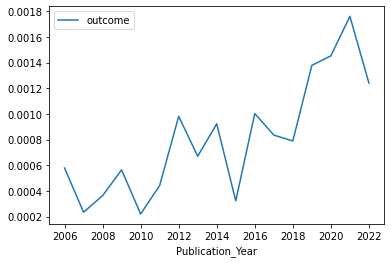

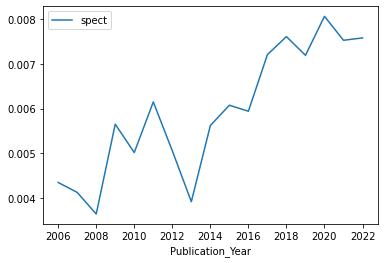

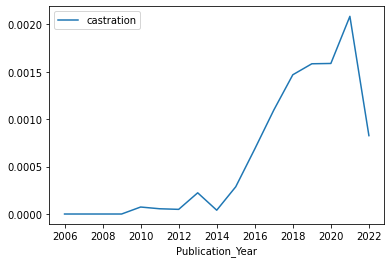

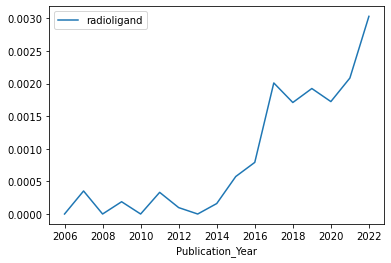

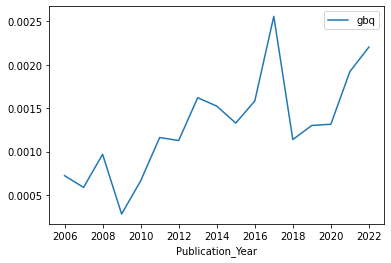

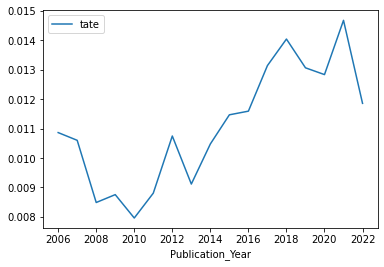

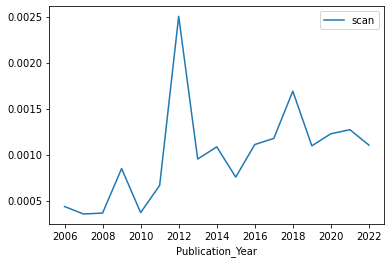

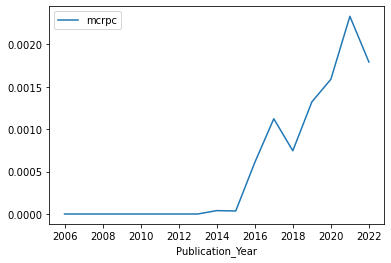

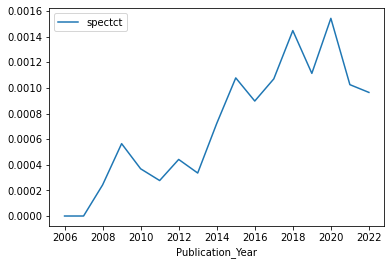

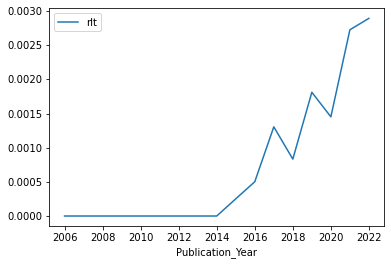

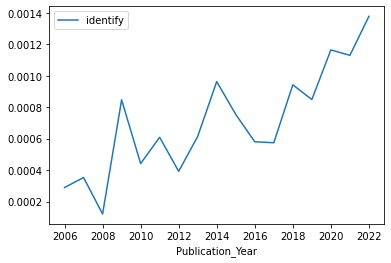

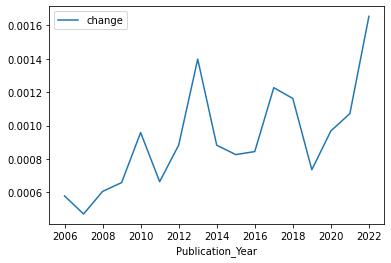

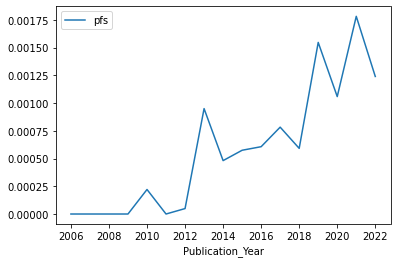

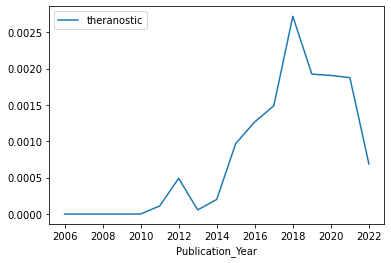

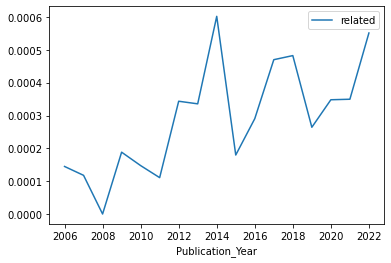

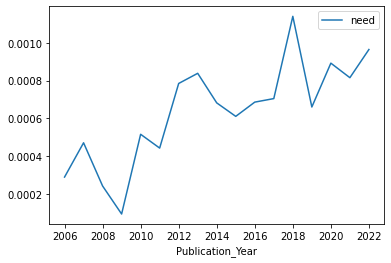

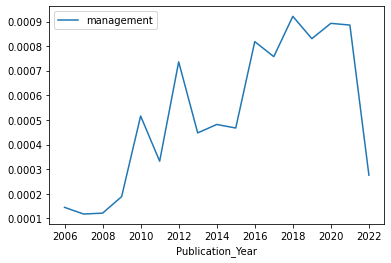

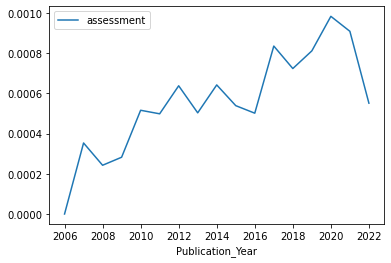

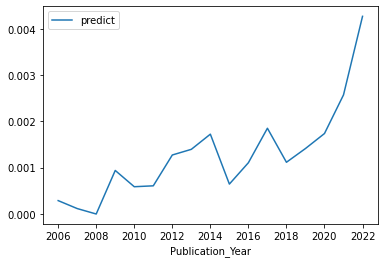

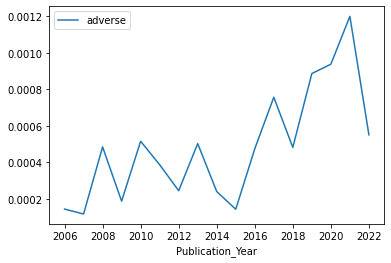

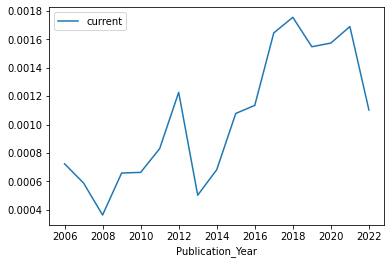

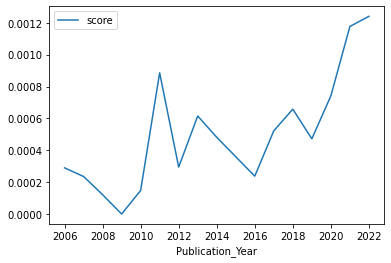

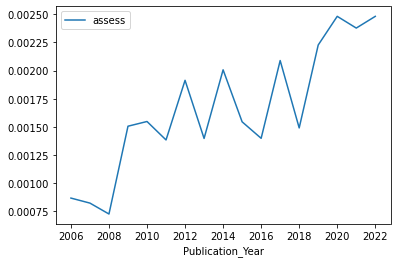

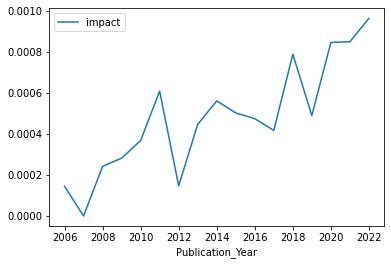

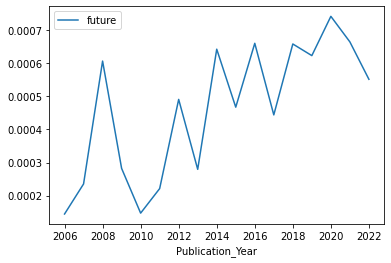

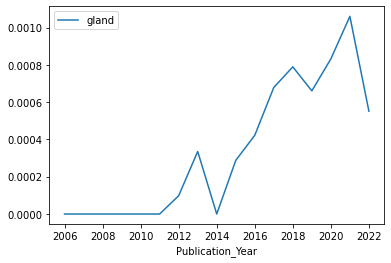

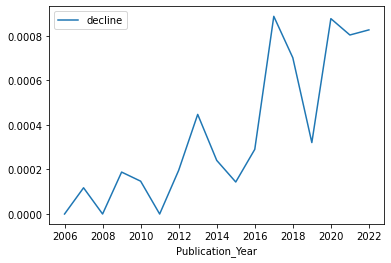

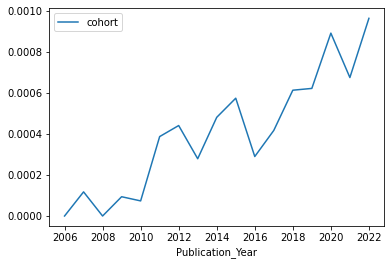

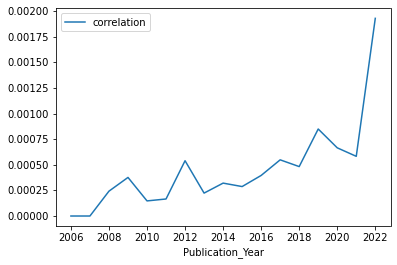

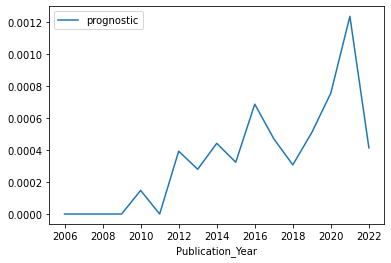

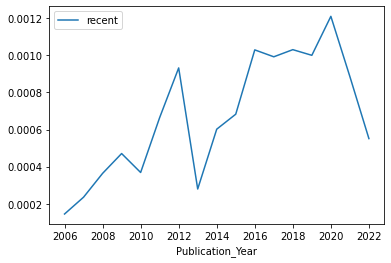

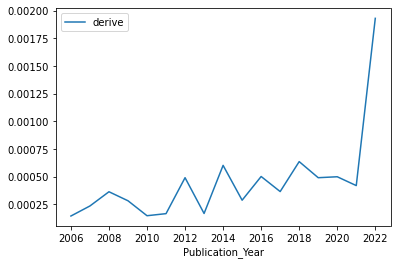

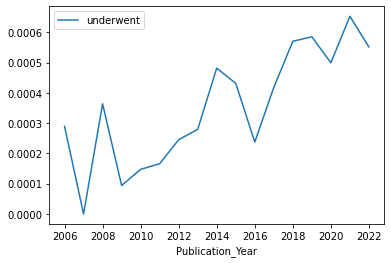

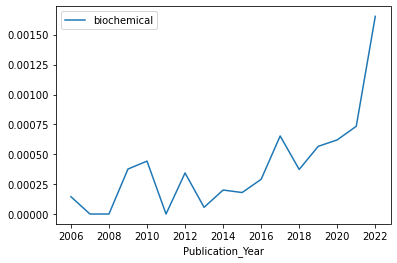

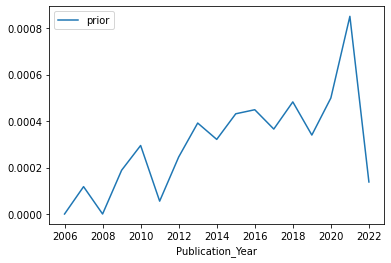

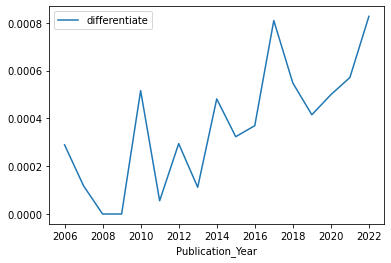

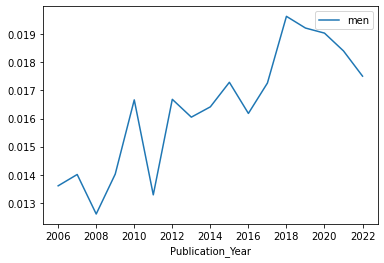

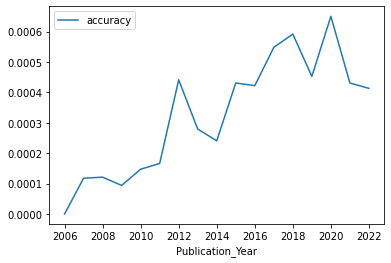

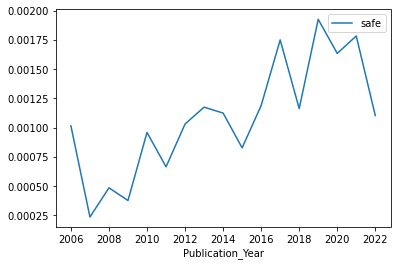

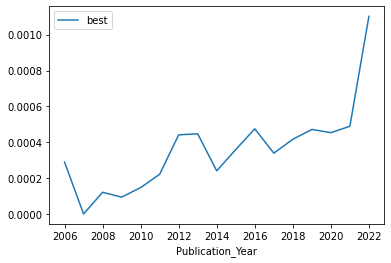

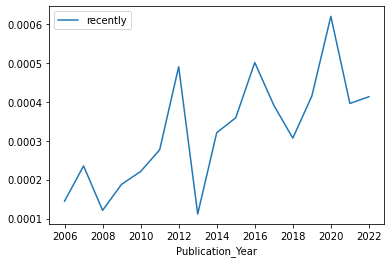

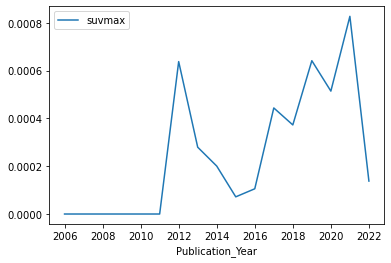

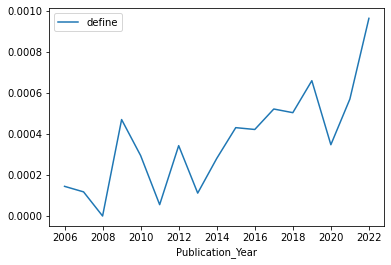

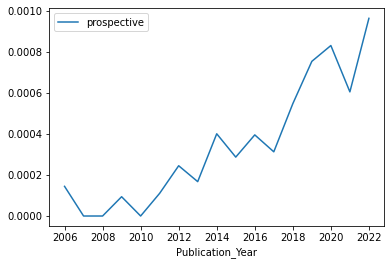

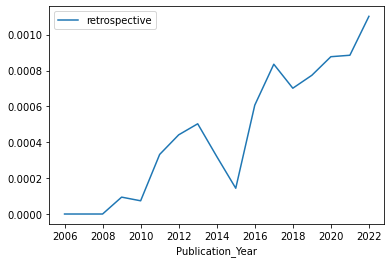

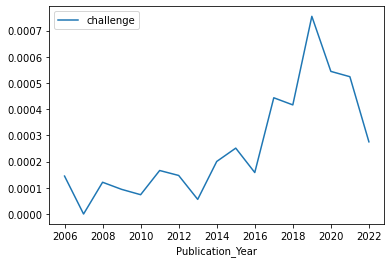

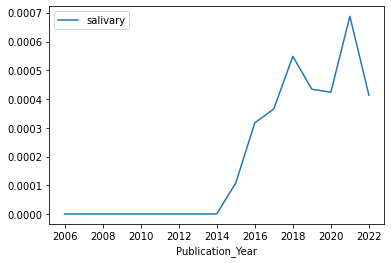

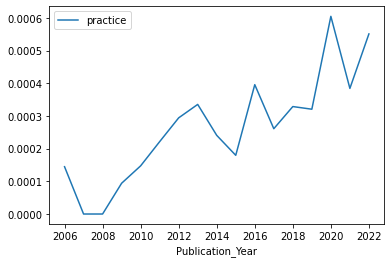

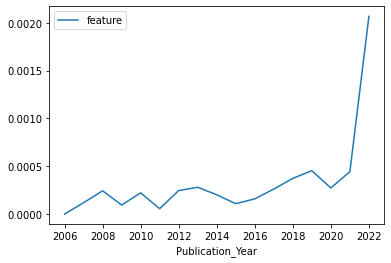

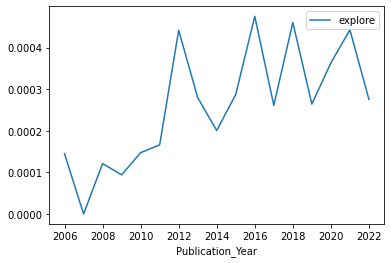

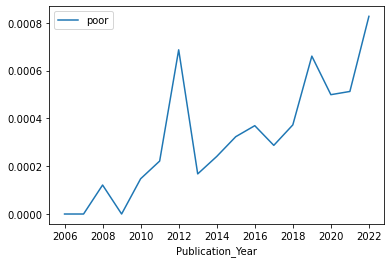

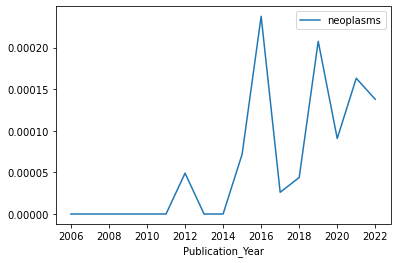

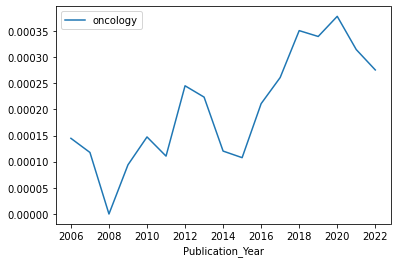

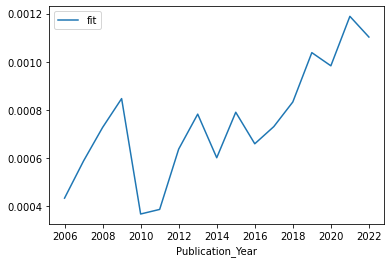

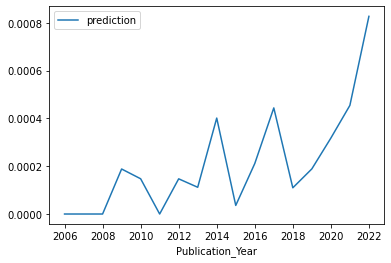

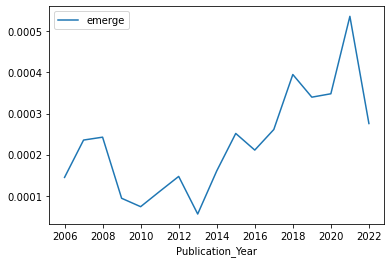

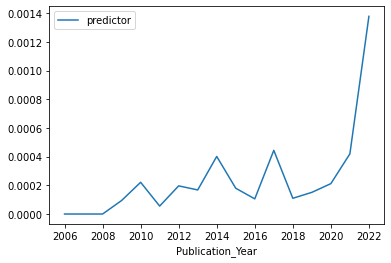

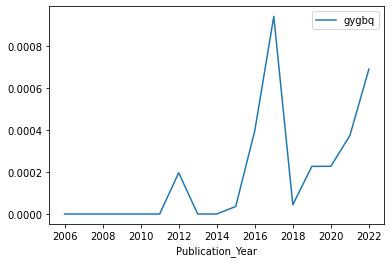

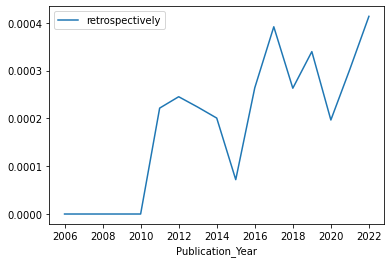

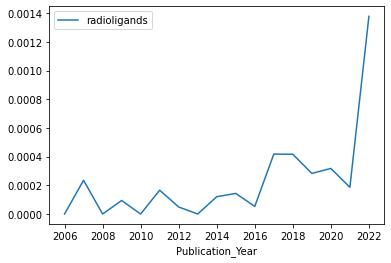

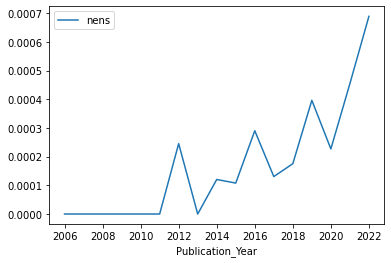

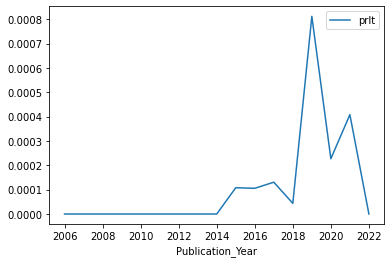

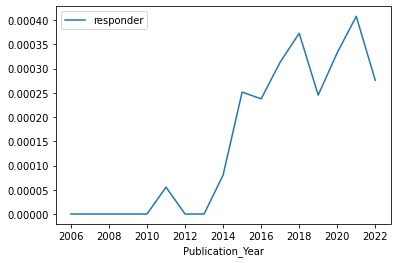

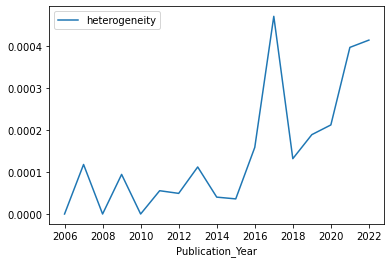

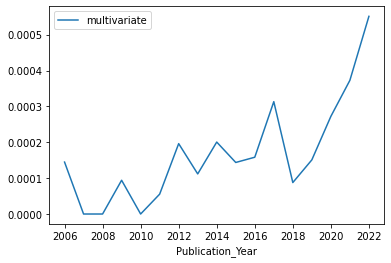

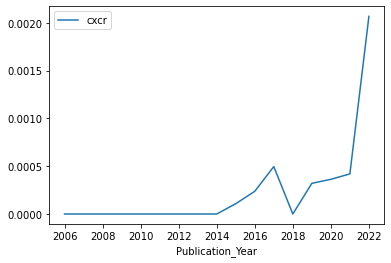

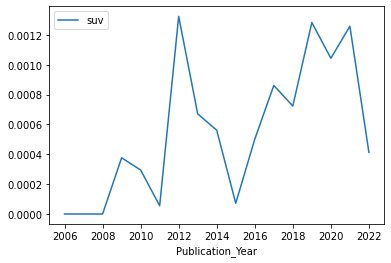

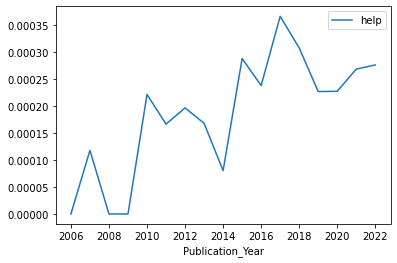

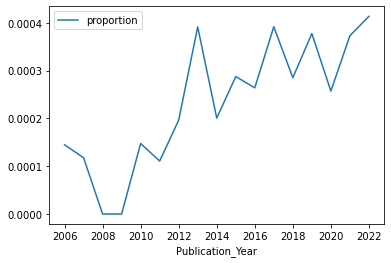

In [12]:
for word in corr_df.index:
    df_frq.plot(y = word, use_index=True)